# 時系列解析

松本市の2023年5月気象データ（気象庁提供）をもとに散布図から始めて，時系列データ解析の一端を観察する．

array([[<Axes: xlabel='日', ylabel='日'>,
        <Axes: xlabel='平均気温', ylabel='日'>,
        <Axes: xlabel='最高気温', ylabel='日'>,
        <Axes: xlabel='最低気温', ylabel='日'>,
        <Axes: xlabel='降水量の合計', ylabel='日'>,
        <Axes: xlabel='日照時間', ylabel='日'>,
        <Axes: xlabel='平均風速', ylabel='日'>,
        <Axes: xlabel='最大風速', ylabel='日'>,
        <Axes: xlabel='平均湿度', ylabel='日'>,
        <Axes: xlabel='最小相対湿度', ylabel='日'>,
        <Axes: xlabel='平均気圧', ylabel='日'>,
        <Axes: xlabel='海面気圧', ylabel='日'>],
       [<Axes: xlabel='日', ylabel='平均気温'>,
        <Axes: xlabel='平均気温', ylabel='平均気温'>,
        <Axes: xlabel='最高気温', ylabel='平均気温'>,
        <Axes: xlabel='最低気温', ylabel='平均気温'>,
        <Axes: xlabel='降水量の合計', ylabel='平均気温'>,
        <Axes: xlabel='日照時間', ylabel='平均気温'>,
        <Axes: xlabel='平均風速', ylabel='平均気温'>,
        <Axes: xlabel='最大風速', ylabel='平均気温'>,
        <Axes: xlabel='平均湿度', ylabel='平均気温'>,
        <Axes: xlabel='最小相対湿度', ylabel='平均気温'>,
        <Axes: xlabel

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 27671 (\N{CJK UNIFIED IDEOGRAPH-6C17}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-67

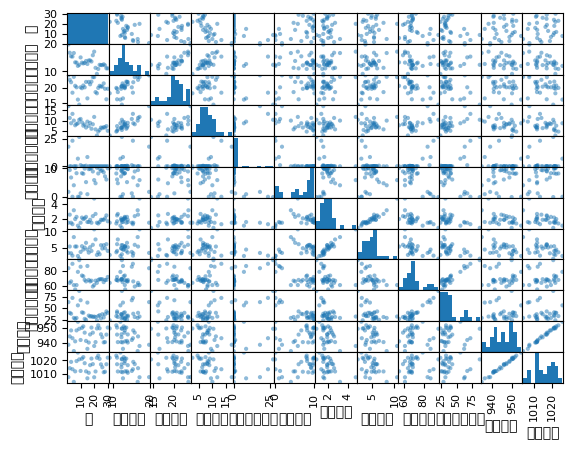

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# データの読み込み，松本市，2023/10
MatsumotoAll = pd.read_csv("matsumoto.csv")
# 各列の名前を確認
MatsumotoAll.head()

# 散布図行列の表示
pd.plotting.scatter_matrix(MatsumotoAll)

ここでは観察を気圧，気温および日照時間に絞ろう．

In [4]:
# 全項目から一部だけを選び新たな変数に置く
Matsu = MatsumotoAll[['日','平均気圧','平均気温','日照時間']]
Matsu.head()

,日,平均気圧,平均気温,日照時間
0,1,938.9,19.8,1.8
1,2,944.5,16.8,9.4
2,3,948.5,15.5,6.8
3,4,943.3,15.4,0.1
4,5,934.7,16.7,4.1


最初に各指標（気温や気圧などのこと）の間の相関を見ておく．
何も相関はなさそうである．
日付の集計（第1行および第1列）は無意味と言えるが，あとの扱いのやりやすさにこのデータフレームで進める．

array([[<Axes: xlabel='日', ylabel='日'>,
        <Axes: xlabel='平均気圧', ylabel='日'>,
        <Axes: xlabel='平均気温', ylabel='日'>,
        <Axes: xlabel='日照時間', ylabel='日'>],
       [<Axes: xlabel='日', ylabel='平均気圧'>,
        <Axes: xlabel='平均気圧', ylabel='平均気圧'>,
        <Axes: xlabel='平均気温', ylabel='平均気圧'>,
        <Axes: xlabel='日照時間', ylabel='平均気圧'>],
       [<Axes: xlabel='日', ylabel='平均気温'>,
        <Axes: xlabel='平均気圧', ylabel='平均気温'>,
        <Axes: xlabel='平均気温', ylabel='平均気温'>,
        <Axes: xlabel='日照時間', ylabel='平均気温'>],
       [<Axes: xlabel='日', ylabel='日照時間'>,
        <Axes: xlabel='平均気圧', ylabel='日照時間'>,
        <Axes: xlabel='平均気温', ylabel='日照時間'>,
        <Axes: xlabel='日照時間', ylabel='日照時間'>]], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 27671 (\N{CJK UNIFIED IDEOGRAPH-6C17}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22311 (\N{CJK UNIFIED IDEOGRAPH-5727}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E

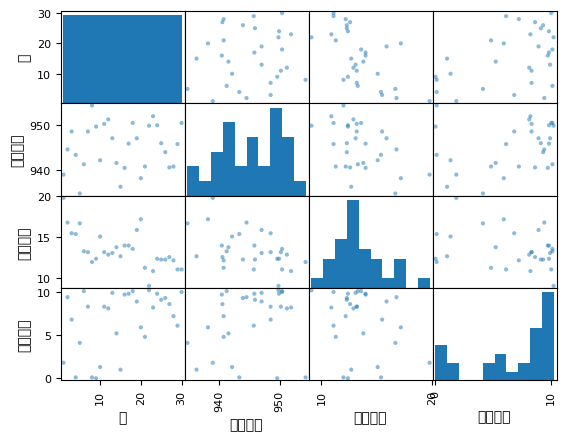

In [5]:
# 最初は全項目だったが，ここでは気圧，気温，日照時間
pd.plotting.scatter_matrix(Matsu)

一ヶ月間の変化をみる．
平均気圧だけを示したが，他の指標（平均気温および日照時間）もグラフにしてみよう．

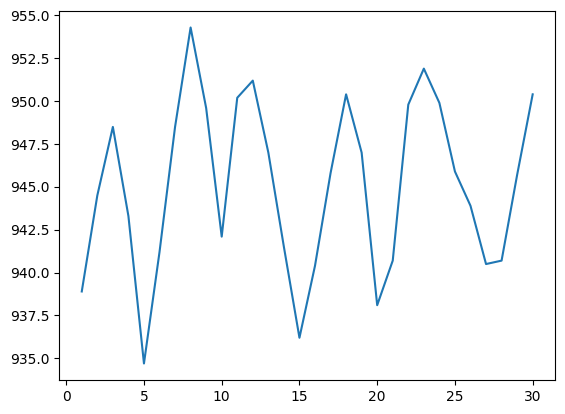

In [6]:
# 次は平均気圧の表示．この文字列を平均気温や日照時間に書き換えて実行してみよう
plt.plot(Matsu['日'],Matsu['平均気圧'])
# 不慣れな人のために先頭のコメントマークを外せば利用できるものを用意はしておいた
# plt.plot(Matsu['日'],Matsu['平均気温'])
# plt.plot(Matsu['日'],Matsu['日照時間'])

「三寒四温」のような気象変化を表すことばもある．
次の例は３日間移動平均を計算する．
関数rollingは移動平均を計算する関数である．
この関数に，３の代わりに7を与えれば，７日間移動平均を計算する．

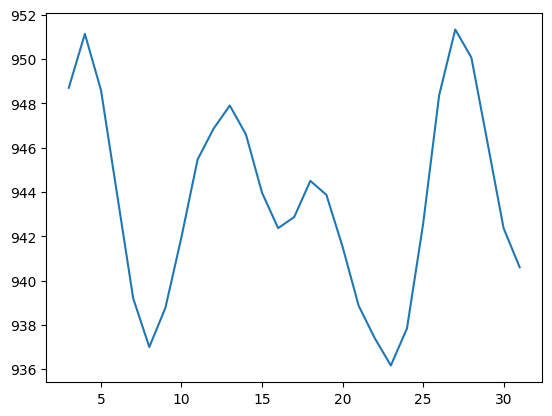

In [ ]:
idou = Matsu['平均気圧'].rolling(3).mean()
# idou = Matsu['平均気圧'].rolling(7).mean()
plt.plot(Matsu['日'],idou)


平均気圧と移動平均とをいっしょのグラフに描かせる．
移動平均は区別のために赤にした．

問：何日間の移動平均が，気圧変化の傾向を見るのに適当に思えるか．
いろいろと試してみよう．

問：平均気温や日照時間ではどうだろうか．



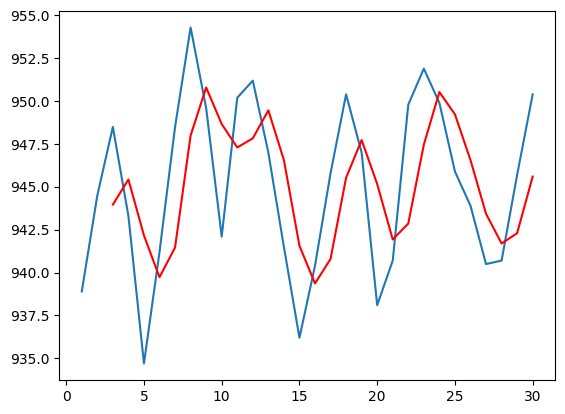

In [7]:
plt.plot(Matsu['日'],Matsu['平均気圧'])

idou = Matsu['平均気圧'].rolling(3).mean()
# idou = Matsu['平均気圧'].rolling(7).mean()
plt.plot(Matsu['日'],idou, color='red')

# 周期を見つける

「いつも週末になると天気が崩れる」のようなことがあれば，7日間周期が見つかるはずである．
そうした周期を計算で求める手法が，自己相関係数をもとにするコレログラムである．

次の例ではstatsmodelsライブラリのもつ関数を利用した．
[Qiitaの解説記事](https://qiita.com/MToyokura/items/8a58cb43e634e6421834)．
変数lagsの指定は何日のラグ（遅れ）まで計算させるかである．
ここでは一ヶ月のデータなので２週間までとした．


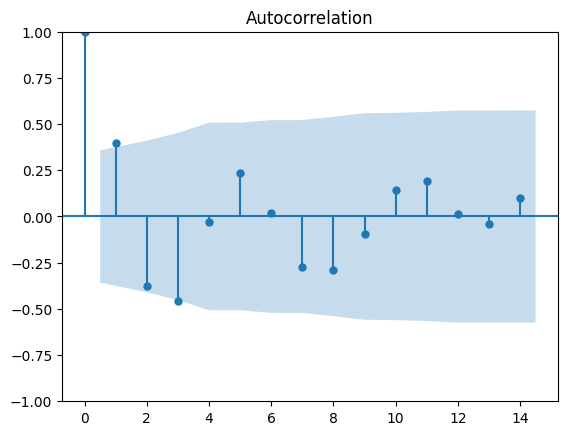

In [8]:
import statsmodels.graphics.api as smg
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(Matsu['平均気圧'], lags=14);

ラグ（遅れ）が０のとき（自己）相関係数の値が１になることは，
散布図の縦軸・横軸に同じものをとった次のグラフからわかるだろう．
他のラグ（遅れ）で塗られた領域を外れた自己相関係数の値を生じた周期が重要である．

この平均気圧の例では，遅れ1日の周期を示している．「前日の気圧が高ければ（低ければ）翌日の気圧は高い（低い）ことが多い」であり，あまり面白くない．

問：平均気圧以外の気象データではどうなるだろうか．

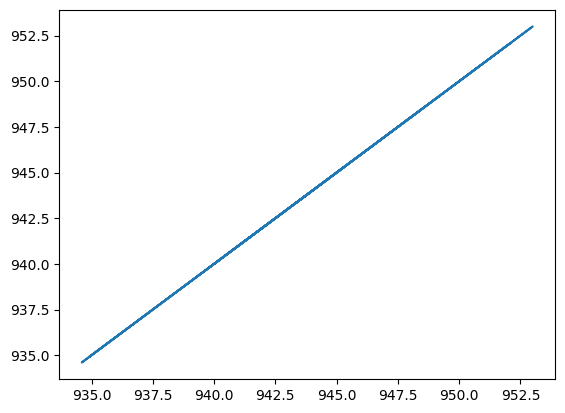

In [ ]:
plt.plot(Matsu['平均気圧'], Matsu['平均気圧']);